In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [70]:
# Load the data
data = pd.read_csv('./data/sample_response_times.csv', sep=';')

The parameter that best reflects task difficulty in the DDM is the drift rate. 

### Stan Program

In [79]:
with open('diffusion_model.stan', 'r') as file:
    program_code = file.read()

### Compilation and Sampling

In [80]:
# Prepare data in Stan
data_dict = {
    'N': len(data),
    'y': data['rt'].values,
    'condition': data['condition'].values.astype(int),
    'choice': data['choice'].values.astype(int)
}

# Compile model
model = stan.build(program_code, data=data_dict)

# Sample
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=2000)

Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/12000)
Sampling:   0% (2/12000)
Sampling:   0% (3/12000)
Sampling:   0% (4/12000)
Sampling:   1% (103/12000)
Sampling:   2% (202/12000)
Sampling:   3% (301/12000)
Sampling:   3% (401/12000)
Sampling:   4% (500/12000)
Sampling:   5% (600/12000)
Sampling:   6% (700/12000)
Sampling:   7% (800/12000)
Sampling:   8% (900/12000)
Sampling:   8% (1000/12000)
Sampling:   9% (1100/12000)
Sampling:  10% (1200/12000)
Sampling:  11% (1300/12000)
Sampling:  12% (1400/12000)
Sampling:  12% (1500/12000)
Sampling:  13% (1600/12000)
Sampling:  14% (1700/12000)
Sampling:  15% (1800/12000)
Sampling:  16% (1900/12000)
Sampling:  17% (2000/12000)
Sampling:  18% (2100/12000)
Sampling:  18% (2200/12000)
Sampling:  19% (2300/12000)
Sampling:  20% (2400/12000)
Sampling:  21% (2500/12000)
Sampling:  22% (2600/12000)
Sampling:  22% (2700/12000)
Sampling:  23% (2800/12000)
Sampling:  24% (2900/12000)
Sampling:  25% (3000/12000)
Sampling:  26% (3100/1

In [81]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v[0],2.583,0.264,2.074,3.060,0.005,0.003,2878.0,2652.0,1.0
v[1],0.331,0.219,-0.068,0.747,0.004,0.003,3078.0,3009.0,1.0
a,0.848,0.026,0.799,0.894,0.000,0.000,2915.0,2683.0,1.0
b,0.520,0.022,0.477,0.558,0.000,0.000,2309.0,2498.0,1.0
tau,0.397,0.003,0.392,0.402,0.000,0.000,2556.0,2546.0,1.0


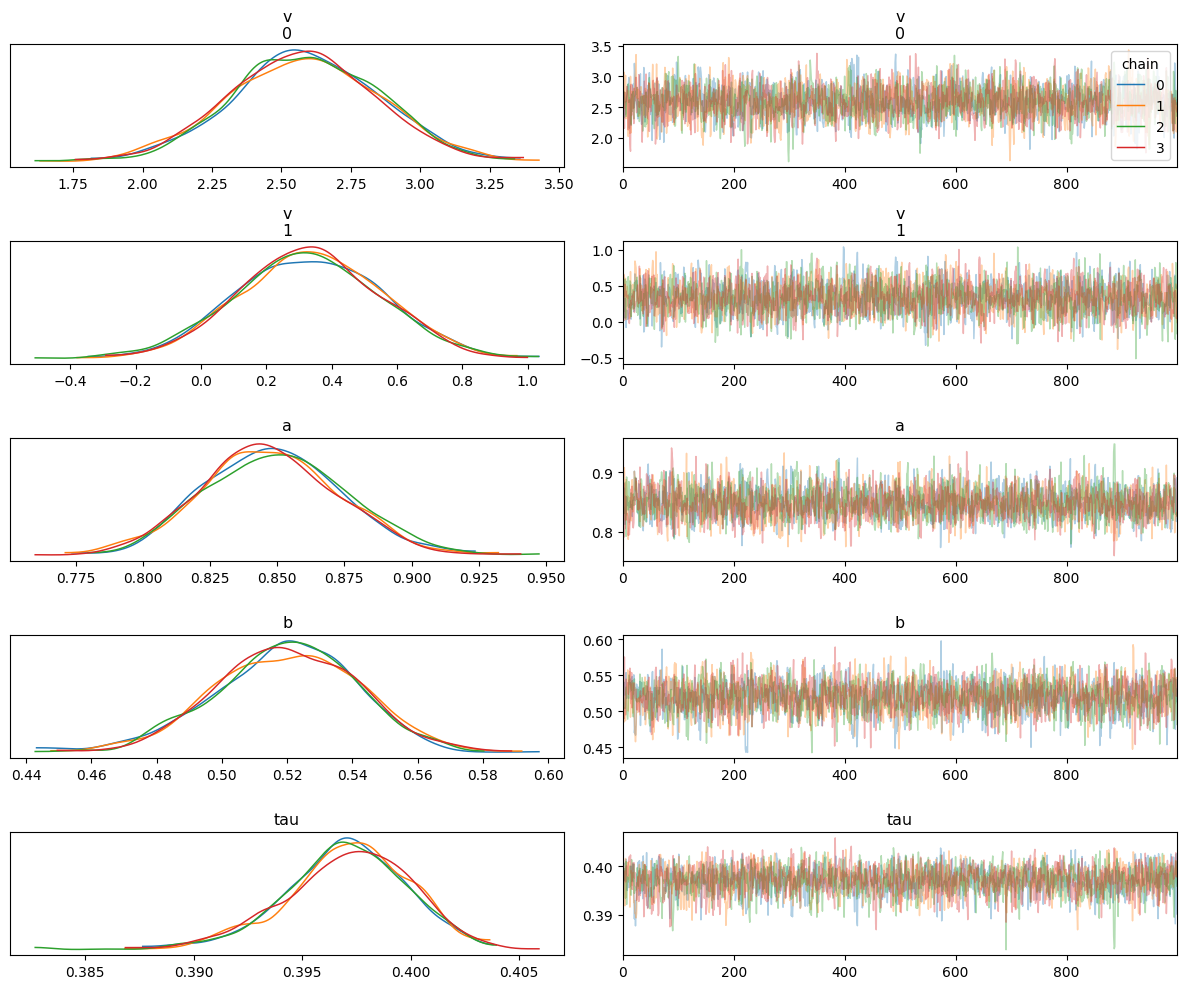

In [82]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

Since v[0] (about 2.583) is higher than v[1] (about 0.331), the condition 1 is the easy condition, and the condition 2 is the difficult condition. 